<a href="https://colab.research.google.com/github/leonardoacosta91/ExploracionNacimientosUruguay/blob/main/ExploracionNombres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introducción**

La idea de esta Notebook es hacer una exploracion de los datos relacionados con el registro de partidas de nacimiento por año, mes y sexo desde 1940 hasta 2012.  
Los mismos corresponden al Sistema de Registro Civil


## Importaciones necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator

## Obteniendo el dataset del catálogo de datos abiertos

In [2]:
#obtenido de https://catalogodatos.gub.uy/dataset/intendencia-montevideo-partidas-de-registro-civil-de-montevideo

rutaProyecto = "/content/drive/My Drive/Colab Notebooks/Nombres/"
datos = pd.read_csv("https://catalogodatos.gub.uy/dataset/6183293e-6ebc-4d7f-ac38-94a232c2881a/resource/8e125978-c9f6-43cd-8f06-064aab942e3e/download/nombre_nacim_x_anio_sexo.csv")
datos.head()

,ANIO,SEXO,NOMBRE,NACIMIENTOS
0,1940,F,NILDA,1
1,1940,F,ABEL,1
2,1940,F,ABELARDA,1
3,1940,F,ABRIL,1
4,1940,F,ADA,11


## Visualización de los nombres con más frecuencia en formato Word Cloud

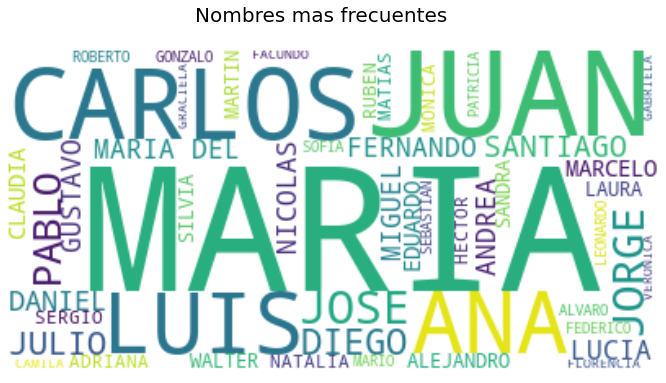

In [3]:
nombresFrecuencia = datos.groupby("NOMBRE")["NACIMIENTOS"].sum().sort_values(ascending=False).reset_index()[:50]

frecuenciaDict = {}
for NOMBRE, NACIMIENTOS in nombresFrecuencia.values:
    frecuenciaDict[NOMBRE] = NACIMIENTOS

wordcloud = WordCloud(background_color="white").generate_from_frequencies(frequencies=frecuenciaDict)

plt.figure(figsize=(14,6))
plt.suptitle('Nombres mas frecuentes', fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(rutaProyecto+"Graficas/wordcloudMasFrecuentes.png")
plt.show()

## Visualización de algunos de los nombres menos frecuentes en Word Cloud

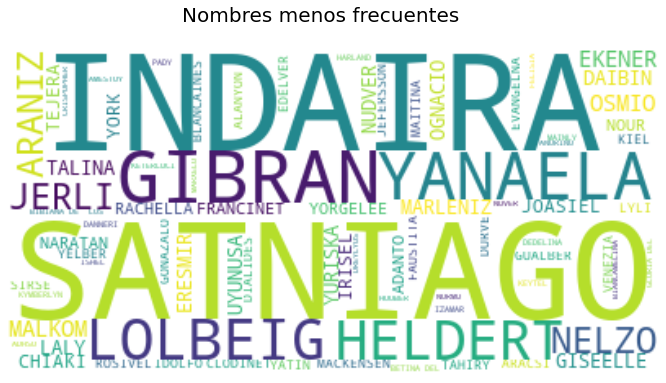

In [13]:
nombresFrecuencia = datos.groupby("NOMBRE")["NACIMIENTOS"].sum().sort_values(ascending=False).reset_index()
nombresFrecuenciaMin = nombresFrecuencia.loc[nombresFrecuencia.NACIMIENTOS == 1].sample(frac=1)[:80]

frecuenciaDict = {}
for NOMBRE, NACIMIENTOS in nombresFrecuenciaMin.values:
    frecuenciaDict[NOMBRE] = NACIMIENTOS

wordcloud = WordCloud(background_color="white").generate_from_frequencies(frequencies=frecuenciaDict)

plt.figure(figsize=(14,6))
plt.suptitle('Nombres menos frecuentes', fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(rutaProyecto+"Graficas/wordcloud.png")
plt.show()

## Hagamos el top 10 de nombres Masculinos más utilizados

Entre los mismos debería de aparecer Juan y Carlos como vimos arriba entre los más usados

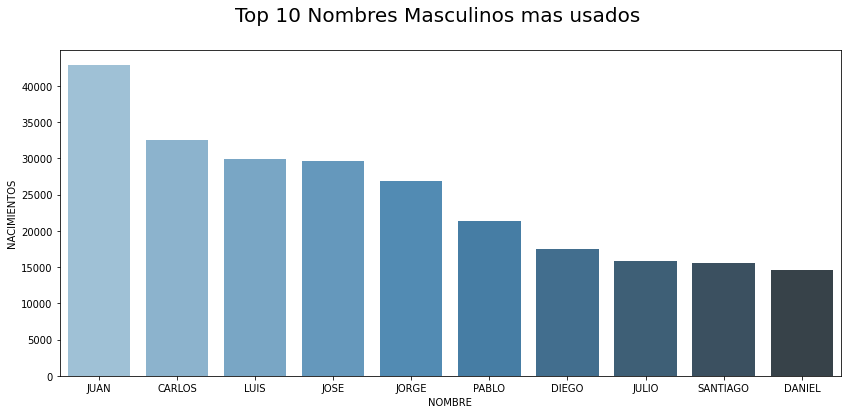

In [14]:
nacimientosNombre = datos.loc[datos.SEXO == "M"].groupby("NOMBRE")["NACIMIENTOS"].sum().sort_values(ascending=False).reset_index()[:10]
plt.figure(figsize=(14,6))
plt.suptitle('Top 10 Nombres Masculinos mas usados', fontsize=20)
sns.barplot(x="NOMBRE",y="NACIMIENTOS",data=nacimientosNombre,palette="Blues_d")
plt.savefig(rutaProyecto+"Graficas/topNombresMasculinos_grafica.png",bbox_inches='tight')

## Hagamos el top 10 de nombres Femeninos más utilizados

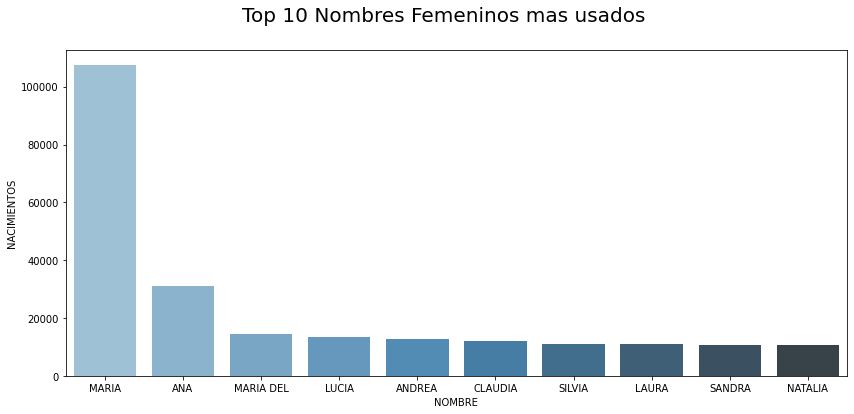

In [15]:
nacimientosNombre = datos.loc[datos.SEXO == "F"].groupby("NOMBRE")["NACIMIENTOS"].sum().sort_values(ascending=False).reset_index()[:10]
plt.figure(figsize=(14,6))
plt.suptitle('Top 10 Nombres Femeninos mas usados', fontsize=20)
sns.barplot(x="NOMBRE",y="NACIMIENTOS",data=nacimientosNombre,palette="Blues_d")
plt.savefig(rutaProyecto+"Graficas/topNombresFemeninos_grafica.png",bbox_inches='tight')

## Grafiquemos la tendencia de mi nombre

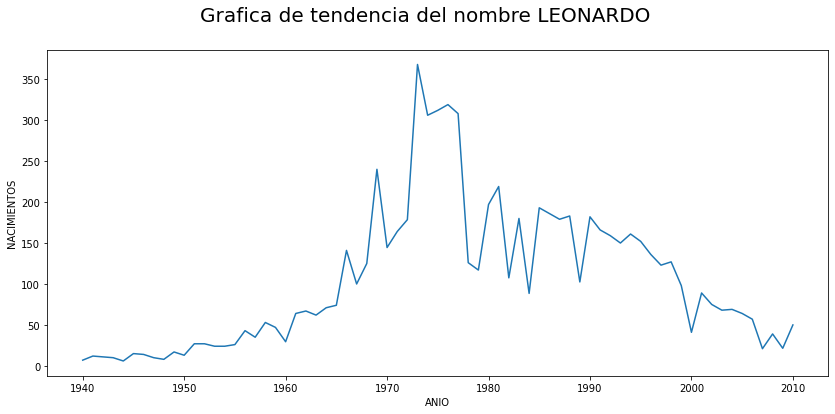

In [17]:
Nombre = "leonardo".upper()
plt.figure(figsize=(14,6))
plt.suptitle('Grafica de tendencia del nombre '+ Nombre, fontsize=20)
sns.lineplot(data=datos[datos.NOMBRE == Nombre][:-2] ,x="ANIO",y="NACIMIENTOS",ci=None)
plt.savefig(rutaProyecto+"Graficas/"+Nombre+"_grafica.png",bbox_inches='tight')

Al parecer el nombre Leonardo ha comenzado a ser cada vez menos popular

## Veamos mi nombre en relación a el mas popular y los nombres de popularidad similar al mio

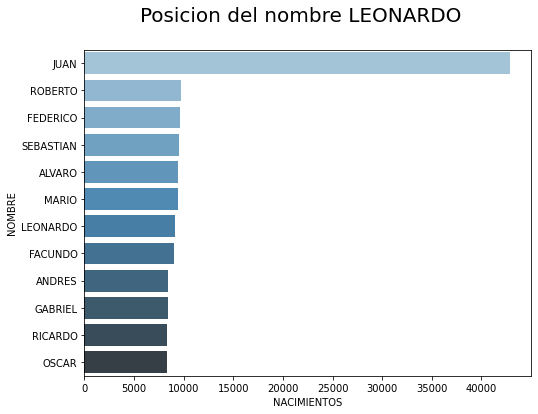

In [18]:
Nombre = "leonardo".upper()
ranking = datos.loc[datos.SEXO == "M"].groupby("NOMBRE")["NACIMIENTOS"].sum().sort_values(ascending=False).reset_index()
posicionNombre = ranking.index[ranking.NOMBRE == Nombre][0]
primerPosicion = ranking.iloc[0:1]
posiciones = ranking.iloc[posicionNombre-5:posicionNombre+6]
posiciones = pd.concat([primerPosicion,posiciones])

plt.figure(figsize=(8,6))
plt.suptitle('Posicion del nombre '+ Nombre, fontsize=20)
sns.barplot(y="NOMBRE",x="NACIMIENTOS",data=posiciones,palette="Blues_d")
plt.savefig(rutaProyecto+"Graficas/posicionamientoNombre.png",bbox_inches='tight')

## Nombres más utilizados en la década del 90

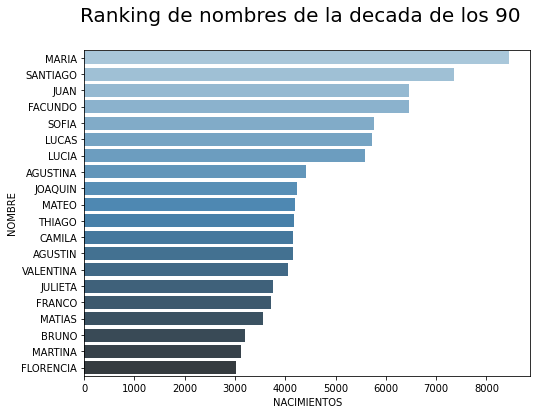

In [20]:
ranking = datos.loc[(datos.ANIO >= 1990) & (datos.ANIO >= 2000)].groupby("NOMBRE")["NACIMIENTOS"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8,6))
plt.suptitle(f'Ranking de nombres de la decada de los 90', fontsize=20)
sns.barplot(y="NOMBRE",x="NACIMIENTOS",data=ranking[:20],palette="Blues_d")
plt.savefig(rutaProyecto+"Graficas/posicionamientoAnioNacimiento90.png",bbox_inches='tight')

## Nombres más utilizados en la primera década de los 2000

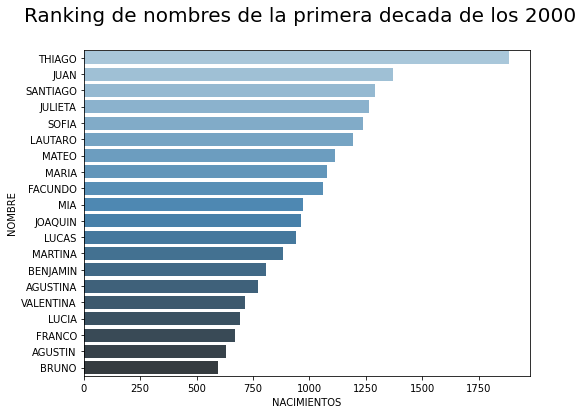

In [21]:
ranking = datos.loc[(datos.ANIO >= 2000) & (datos.ANIO >= 2010)].groupby("NOMBRE")["NACIMIENTOS"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8,6))
plt.suptitle(f'Ranking de nombres de la primera decada de los 2000', fontsize=20)
sns.barplot(y="NOMBRE",x="NACIMIENTOS",data=ranking[:20],palette="Blues_d")
plt.savefig(rutaProyecto+"Graficas/posicionamientoAnioNacimiento.png",bbox_inches='tight')

## Nacimientos por año

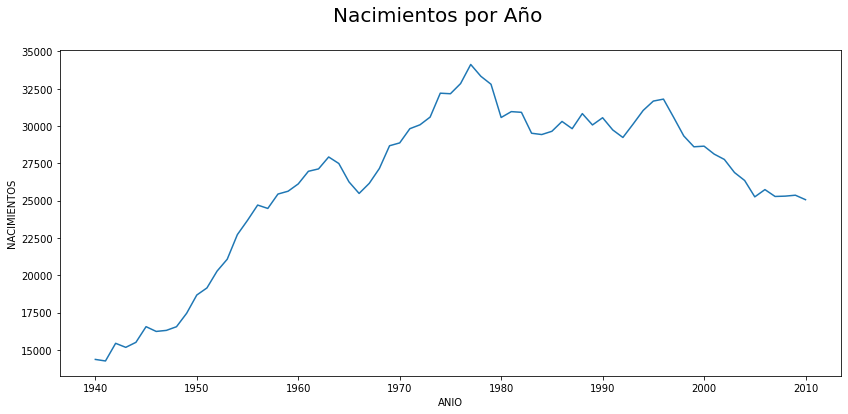

In [22]:
nacimientosAnio = datos.groupby("ANIO")["NACIMIENTOS"].sum().reset_index()
plt.figure(figsize=(14,6))
plt.suptitle('Nacimientos por Año', fontsize=20)
sns.lineplot(data=nacimientosAnio[:-2] ,x="ANIO",y="NACIMIENTOS",ci=None)
plt.savefig(rutaProyecto+"Graficas/nacimientosAnio_grafica.png",bbox_inches='tight')

## Nacimientos por año y sexo

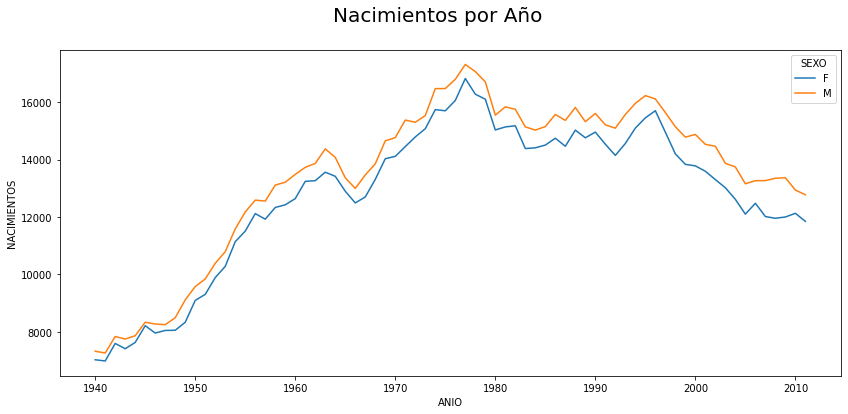

In [23]:
nacimientosAnioSexo = datos.groupby(["ANIO","SEXO"])["NACIMIENTOS"].sum().reset_index()
plt.figure(figsize=(14,6))
plt.suptitle('Nacimientos por Año', fontsize=20)
sns.lineplot(data=nacimientosAnioSexo[:-2] ,x="ANIO",y="NACIMIENTOS",hue="SEXO",ci=None)
plt.savefig(rutaProyecto+"Graficas/nacimientosAnioSexo_grafica.png",bbox_inches='tight')